In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_p_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        44.0463 (31.5113, 59.8277) (30.5226, 58.4986) 27.9759 (Jnode 202)\n',
 't_n104        43.3711 (31.0190, 58.9675) (30.1812, 57.7764) 27.5952 (Jnode 201)\n',
 't_n105        42.6081 (30.4648, 57.9855) (29.6926, 56.8084) 27.1158 (Jnode 200)\n',
 't_n106        39.7928 (28.4546, 54.3745) (27.5532, 53.0583) 25.5052 (Jnode 199)\n',
 't_n107        37.9478 (27.1274, 51.9555) (26.4149, 50.8837) 24.4688 (Jnode 198)\n',
 't_n108        37.5645 (26.8457, 51.4621) (26.0218, 50.2725) 24.2507 (Jnode 197)\n',
 't_n109        37.0974 (26.5075, 50.8681) (25.6295, 49.5997) 23.9702 (Jnode 196)\n',
 't_n110        36.7048 (26.2224, 50.3671) (25.3976, 49.1447) 23.7471 (Jnode 195)\n',
 't_n111        36.5639 (26.1193, 50.1894) (25.3742, 49.0571) 23.6829 (Jnode 194)\n',
 't_n112        27.2536 (18.6288, 38.7940) (17.9620, 37.7279) 19.7660 (Jnode 193)\n',
 't_n113        24.3214 (16.4568, 35.1077) (15.7430, 33.9310) 18.1880 (Jnode 192)\n',
 't_n114        22.5395 (15.1444, 32.8486) (14.4864, 3

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[44.0463,
 43.3711,
 42.6081,
 39.7928,
 37.9478,
 37.5645,
 37.0974,
 36.7048,
 36.5639,
 27.2536,
 24.3214,
 22.5395,
 18.0761,
 16.028,
 17.286,
 21.2011,
 15.8812,
 30.9729,
 20.6098,
 24.8587,
 23.6366,
 13.7879,
 16.631,
 31.1484,
 27.9365,
 20.2823,
 30.9858,
 23.8034,
 21.7287,
 18.3048,
 18.2602,
 10.7031,
 9.7641,
 28.3407,
 34.9941,
 21.9963,
 33.0766,
 29.1477,
 26.4321,
 23.1376,
 19.2276,
 19.2643,
 18.6231,
 15.0231,
 7.3215,
 27.4278,
 20.8601,
 14.7946,
 9.8722,
 35.9278,
 25.331,
 16.6751,
 21.0434,
 32.8195,
 24.983,
 27.3817,
 15.026,
 35.1594,
 33.495,
 30.9301,
 24.1193,
 17.5063,
 16.0313,
 3.4393,
 27.7752,
 21.9425,
 21.3973,
 43.2068,
 40.3728,
 37.7553,
 35.8473,
 33.5542,
 29.7657,
 28.0614,
 27.0471,
 20.7421,
 16.9372,
 14.4072,
 25.7423,
 20.5946,
 10.1852,
 17.9618,
 27.3916,
 22.8235,
 19.7845,
 14.803,
 11.1583,
 22.4158,
 17.8804,
 15.7303,
 28.9052,
 20.3906,
 19.3892,
 12.873,
 3.8225,
 19.7138,
 14.5848,
 8.1503,
 3.2403,
 40.2374,
 23.9367]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[43.7578,
 41.1169,
 40.104,
 37.6105,
 36.5915,
 34.1085,
 24.9649,
 24.7389,
 23.831,
 22.8559,
 21.8178,
 17.3503,
 8.7404,
 5.4029,
 10.5075,
 17.4105,
 14.1379,
 22.6804,
 21.5065,
 15.8458,
 12.9416,
 5.2567,
 11.1985,
 21.0059,
 19.3606,
 8.4036,
 23.614,
 21.6417,
 15.7459,
 13.4329,
 15.4334,
 9.0942,
 6.963,
 13.6292,
 32.0394,
 24.0701,
 34.6559,
 30.8515,
 25.5348,
 21.2019,
 16.556,
 17.0066,
 11.5365,
 5.7687,
 4.2608,
 28.0693,
 24.775,
 11.6252,
 4.9101,
 38.1921,
 34.2493,
 25.0231,
 15.3378,
 28.426,
 10.3994,
 20.585,
 10.8742,
 40.4428,
 37.4749,
 29.2109,
 18.6288,
 16.5237,
 13.5595,
 9.2975,
 32.2806,
 17.7231,
 25.4119,
 32.6938,
 31.3277,
 30.1474,
 28.8164,
 26.6801,
 25.759,
 24.6974,
 23.4783,
 21.4447,
 18.6887,
 12.6065,
 16.3183,
 10.6368,
 9.1836,
 9.2502,
 23.2262,
 20.9468,
 19.6872,
 16.5202,
 9.3943,
 19.908,
 16.7099,
 9.3479,
 25.4376,
 23.1391,
 15.7304,
 14.0638,
 3.6918,
 13.896,
 11.7311,
 8.7491,
 3.3331,
 31.6994,
 18.68]

In [12]:
posterior_mean_iqtree

[44.0463,
 43.3711,
 42.6081,
 39.7928,
 37.9478,
 37.5645,
 37.0974,
 36.7048,
 36.5639,
 27.2536,
 24.3214,
 22.5395,
 18.0761,
 16.028,
 17.286,
 21.2011,
 15.8812,
 30.9729,
 20.6098,
 24.8587,
 23.6366,
 13.7879,
 16.631,
 31.1484,
 27.9365,
 20.2823,
 30.9858,
 23.8034,
 21.7287,
 18.3048,
 18.2602,
 10.7031,
 9.7641,
 28.3407,
 34.9941,
 21.9963,
 33.0766,
 29.1477,
 26.4321,
 23.1376,
 19.2276,
 19.2643,
 18.6231,
 15.0231,
 7.3215,
 27.4278,
 20.8601,
 14.7946,
 9.8722,
 35.9278,
 25.331,
 16.6751,
 21.0434,
 32.8195,
 24.983,
 27.3817,
 15.026,
 35.1594,
 33.495,
 30.9301,
 24.1193,
 17.5063,
 16.0313,
 3.4393,
 27.7752,
 21.9425,
 21.3973,
 43.2068,
 40.3728,
 37.7553,
 35.8473,
 33.5542,
 29.7657,
 28.0614,
 27.0471,
 20.7421,
 16.9372,
 14.4072,
 25.7423,
 20.5946,
 10.1852,
 17.9618,
 27.3916,
 22.8235,
 19.7845,
 14.803,
 11.1583,
 22.4158,
 17.8804,
 15.7303,
 28.9052,
 20.3906,
 19.3892,
 12.873,
 3.8225,
 19.7138,
 14.5848,
 8.1503,
 3.2403,
 40.2374,
 23.9367]

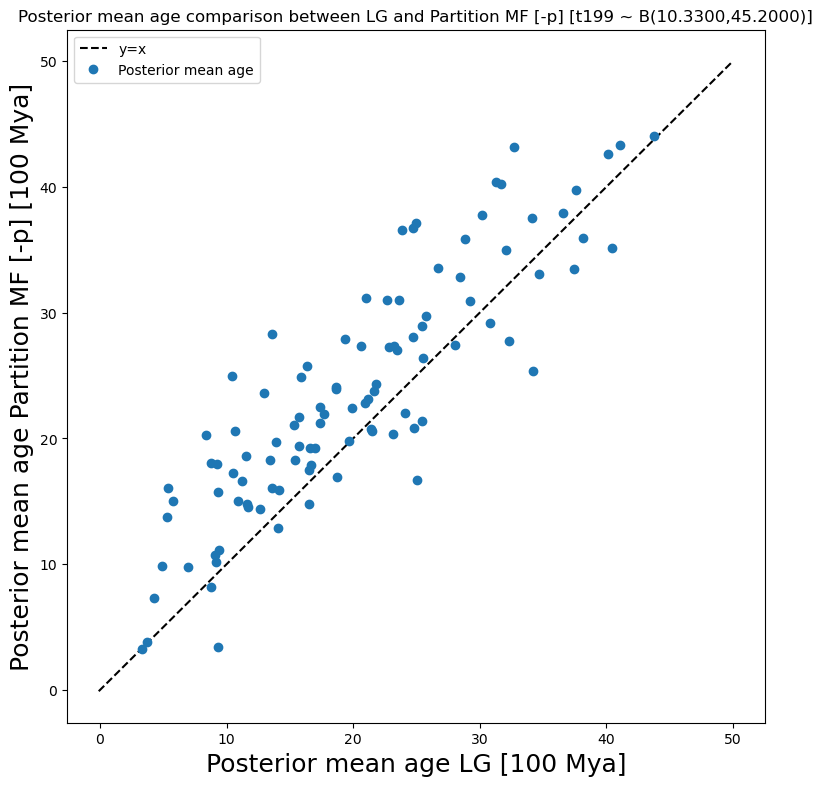

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-p] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_p_middle_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')